In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [14]:
url = r"C:\Users\User\Downloads\premier_league_stats.csv"

In [16]:
df = pd.read_csv( url )

In [30]:
df.head(10)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28,5,83,60,1,698,256,21,12,...,918,258,25686,NaN,1,NaN,2,37,25,2006-2007
1,Chelsea,24,3,64,62,4,636,216,14,16,...,897,231,24010,NaN,2,NaN,1,74,22,2006-2007
2,Liverpool,20,10,57,44,0,668,214,15,8,...,1107,282,24150,NaN,1,NaN,0,51,27,2006-2007
3,Arsenal,19,8,63,59,3,638,226,19,10,...,873,278,25592,NaN,1,NaN,0,88,27,2006-2007
4,Tottenham Hotspur,17,12,57,48,3,520,184,6,5,...,796,181,22200,NaN,2,NaN,0,51,24,2006-2007
5,Bolton Wanderers,16,14,47,84,4,404,120,7,10,...,942,217,18932,NaN,6,NaN,2,44,21,2006-2007
6,Reading,16,15,52,38,3,419,132,8,15,...,1067,280,18017,NaN,2,NaN,0,63,21,2006-2007
7,Blackburn Rovers,15,16,52,77,6,478,155,5,12,...,911,205,20812,NaN,8,NaN,5,56,25,2006-2007
8,Everton,15,10,52,65,2,465,153,9,9,...,867,208,19250,NaN,2,NaN,1,83,15,2006-2007
9,Portsmouth,14,12,45,48,1,525,186,9,13,...,783,247,19377,NaN,4,NaN,2,79,30,2006-2007


In [32]:
df.tail()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
235,Huddersfield Town,9,19,28,62,3,362,109,8,5,...,765,165,22619,21.0,6,416.0,2,31,24,2017-2018
236,Swansea City,8,21,28,51,1,338,103,8,3,...,694,150,22775,26.0,1,439.0,3,44,15,2017-2018
237,Southampton,7,16,37,63,2,450,145,15,7,...,800,227,24639,37.0,4,379.0,1,29,13,2017-2018
238,Stoke City,7,19,35,62,1,384,132,8,8,...,598,136,20368,33.0,3,402.0,0,27,14,2017-2018
239,West Bromwich Albion,6,19,31,73,1,378,114,7,10,...,784,176,20552,28.0,3,446.0,0,40,5,2017-2018


In [36]:
df.shape

(240, 42)

In [56]:
df.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    int64  
 2   losses                240 non-null    int64  
 3   goals                 240 non-null    int64  
 4   total_yel_card        240 non-null    int64  
 5   total_red_card        240 non-null    int64  
 6   total_scoring_att     240 non-null    int64  
 7   ontarget_scoring_att  240 non-null    int64  
 8   hit_woodwork          240 non-null    int64  
 9   att_hd_goal           240 non-null    int64  
 10  att_pen_goal          240 non-null    int64  
 11  att_freekick_goal     240 non-null    int64  
 12  att_ibox_goal         240 non-null    int64  
 13  att_obox_goal         240 non-null    int64  
 14  goal_fastbreak        240 non-null    int64  
 15  total_offside         2

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wins,240.0,14.150000,6.022482,1.0,10.00,12.0,18.00,32.0
losses,240.0,14.150000,5.596846,2.0,10.00,15.0,19.00,29.0
goals,240.0,51.062500,16.203474,20.0,40.00,47.0,61.00,106.0
total_yel_card,240.0,61.079167,10.078249,38.0,54.00,60.5,67.00,94.0
total_red_card,240.0,2.862500,1.802442,0.0,1.00,3.0,4.00,9.0
total_scoring_att,240.0,514.241667,95.979164,338.0,441.00,498.5,572.00,834.0
ontarget_scoring_att,240.0,168.116667,38.748882,94.0,140.00,158.5,194.25,288.0
hit_woodwork,240.0,12.283333,4.820950,4.0,9.00,11.5,15.00,33.0
att_hd_goal,240.0,9.016667,3.659077,1.0,6.00,9.0,12.00,18.0
att_pen_goal,240.0,3.650000,2.052246,0.0,2.00,3.5,5.00,11.0


In [68]:
df.describe().sum()

wins                       333.172482
losses                     334.746846
goals                      581.265974
total_yel_card             624.657416
total_red_card             261.664942
total_scoring_att         3533.720831
ontarget_scoring_att      1321.615549
hit_woodwork               329.604284
att_hd_goal                298.675743
att_pen_goal               267.202246
att_freekick_goal          252.830902
att_ibox_goal              531.666351
att_obox_goal              296.650772
goal_fastbreak             264.401823
total_offside              789.027864
clean_sheet                313.095893
goals_conceded             566.522117
saves                      621.142697
outfielder_block          1077.825078
interception              3691.292186
total_tackle              4963.587534
last_man_tackle            291.586434
total_clearance           8272.650057
head_clearance            4542.449939
own_goals                  255.438485
penalty_conceded           274.012113
pen_goals_co

In [72]:
df.isnull().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [76]:
df["team"].head()

0    Manchester United
1              Chelsea
2            Liverpool
3              Arsenal
4    Tottenham Hotspur
Name: team, dtype: object

In [78]:
df.dtypes

team                     object
wins                      int64
losses                    int64
goals                     int64
total_yel_card            int64
total_red_card            int64
total_scoring_att         int64
ontarget_scoring_att      int64
hit_woodwork              int64
att_hd_goal               int64
att_pen_goal              int64
att_freekick_goal         int64
att_ibox_goal             int64
att_obox_goal             int64
goal_fastbreak            int64
total_offside             int64
clean_sheet               int64
goals_conceded            int64
saves                   float64
outfielder_block          int64
interception              int64
total_tackle              int64
last_man_tackle           int64
total_clearance           int64
head_clearance          float64
own_goals                 int64
penalty_conceded          int64
pen_goals_conceded        int64
total_pass                int64
total_through_ball      float64
total_long_balls          int64
backward

In [84]:
df.duplicated

<bound method DataFrame.duplicated of                      team  wins  losses  goals  total_yel_card  \
0       Manchester United    28       5     83              60   
1                 Chelsea    24       3     64              62   
2               Liverpool    20      10     57              44   
3                 Arsenal    19       8     63              59   
4       Tottenham Hotspur    17      12     57              48   
..                    ...   ...     ...    ...             ...   
235     Huddersfield Town     9      19     28              62   
236          Swansea City     8      21     28              51   
237           Southampton     7      16     37              63   
238            Stoke City     7      19     35              62   
239  West Bromwich Albion     6      19     31              73   

     total_red_card  total_scoring_att  ontarget_scoring_att  hit_woodwork  \
0                 1                698                   256            21   
1            

In [86]:
df.drop_duplicates( inplace = True )

In [90]:
df.rename( columns ={"team": "PL Teams"}, inplace=True)

In [92]:
df.head(3)

,PL Teams,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28,5,83,60,1,698,256,21,12,...,918,258,25686,NaN,1,NaN,2,37,25,2006-2007
1,Chelsea,24,3,64,62,4,636,216,14,16,...,897,231,24010,NaN,2,NaN,1,74,22,2006-2007
2,Liverpool,20,10,57,44,0,668,214,15,8,...,1107,282,24150,NaN,1,NaN,0,51,27,2006-2007


In [100]:
df.drop( columns=[ "punches", "hit_woodwork", "att_obox_goal", "att_pen_goal","total_yel_card", "total_red_card", "total_scoring_att" ], 
        inplace = True )


In [106]:
df.shape

(240, 35)

In [108]:
df.head(2)

,PL Teams,wins,losses,goals,ontarget_scoring_att,att_hd_goal,att_freekick_goal,att_ibox_goal,goal_fastbreak,total_offside,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,season
0,Manchester United,28,5,83,256,12,1,72,9,80,...,NaN,918,258,25686,NaN,1,NaN,2,37,2006-2007
1,Chelsea,24,3,64,216,16,6,41,6,127,...,NaN,897,231,24010,NaN,2,NaN,1,74,2006-2007


In [116]:
#EDA Part

df["wins"].unique()

array([28, 24, 20, 19, 17, 16, 15, 14, 12, 11, 10,  8,  5, 27, 25, 21, 13,
        9,  1,  7, 23, 18,  6, 22,  4, 26,  3, 30, 32], dtype=int64)

In [124]:
df.value_counts().sum()

160

In [143]:
df.corr

<bound method DataFrame.corr of                  PL Teams  wins  losses  goals  ontarget_scoring_att  \
0       Manchester United    28       5     83                   256   
1                 Chelsea    24       3     64                   216   
2               Liverpool    20      10     57                   214   
3                 Arsenal    19       8     63                   226   
4       Tottenham Hotspur    17      12     57                   184   
..                    ...   ...     ...    ...                   ...   
235     Huddersfield Town     9      19     28                   109   
236          Swansea City     8      21     28                   103   
237           Southampton     7      16     37                   145   
238            Stoke City     7      19     35                   132   
239  West Bromwich Albion     6      19     31                   114   

     att_hd_goal  att_freekick_goal  att_ibox_goal  goal_fastbreak  \
0             12                 

In [145]:
df["wins"].value_counts()

wins
11    32
12    26
10    20
9     16
8     14
16    11
7     11
21    11
13    10
19    10
15     9
14     9
18     7
23     7
17     6
28     5
25     5
20     5
24     4
27     4
6      4
5      3
22     3
26     3
1      1
4      1
3      1
30     1
32     1
Name: count, dtype: int64

In [147]:
df["PL Teams"].describe()

count                   240
unique                   39
top       Manchester United
freq                     12
Name: PL Teams, dtype: object

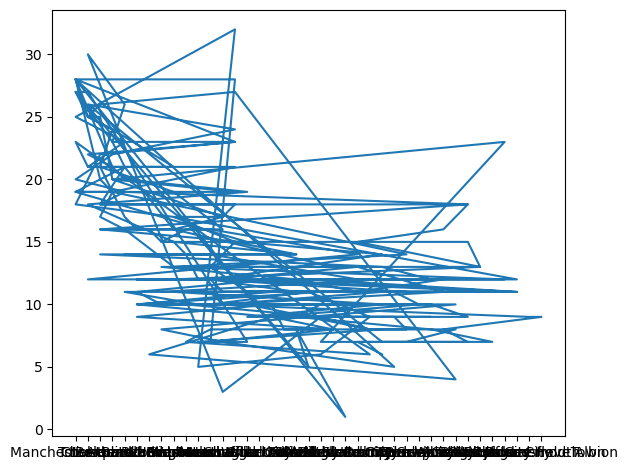

In [167]:
#Visulaization

#Line PLot


plt.plot(df["PL Teams"], df["wins"])

plt.tight_layout()
plt.show()


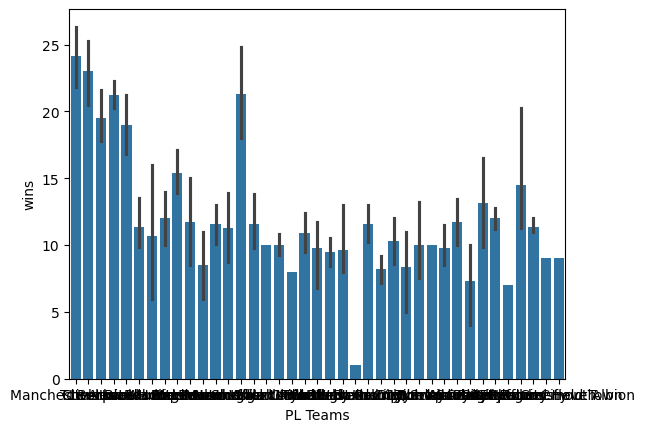

In [175]:
#Bar PLot

sns.barplot( x="PL Teams", y="wins", data=df)

plt.show()

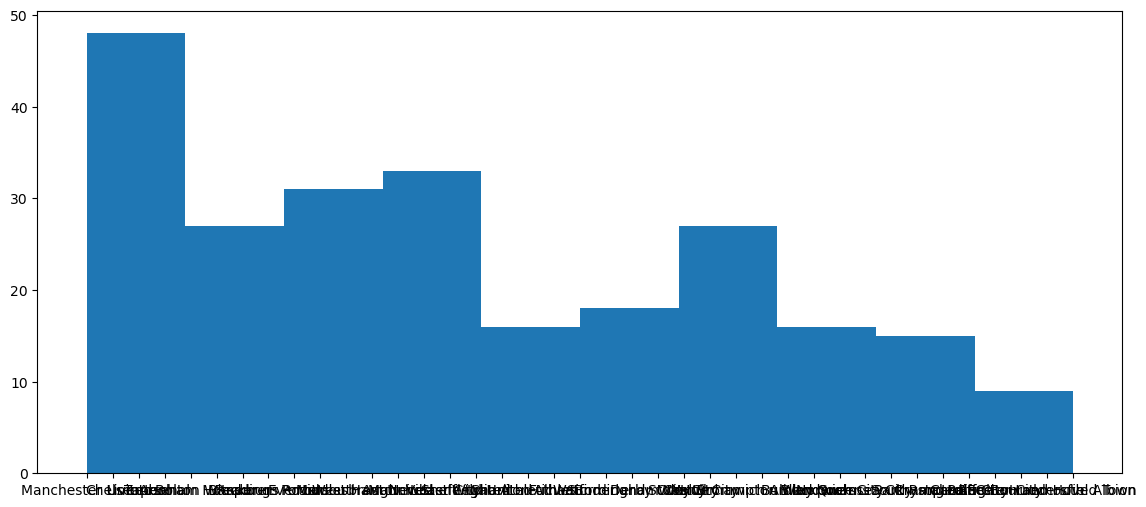

In [179]:
#Histogram
plt.figure(figsize=(14,6))
plt.hist(df["PL Teams"])
plt.show()

In [181]:
df.shape

(240, 35)

In [183]:
df.columns

Index(['PL Teams', 'wins', 'losses', 'goals', 'ontarget_scoring_att',
       'att_hd_goal', 'att_freekick_goal', 'att_ibox_goal', 'goal_fastbreak',
       'total_offside', 'clean_sheet', 'goals_conceded', 'saves',
       'outfielder_block', 'interception', 'total_tackle', 'last_man_tackle',
       'total_clearance', 'head_clearance', 'own_goals', 'penalty_conceded',
       'pen_goals_conceded', 'total_pass', 'total_through_ball',
       'total_long_balls', 'backward_pass', 'total_cross', 'corner_taken',
       'touches', 'big_chance_missed', 'clearance_off_line', 'dispossessed',
       'penalty_save', 'total_high_claim', 'season'],
      dtype='object')

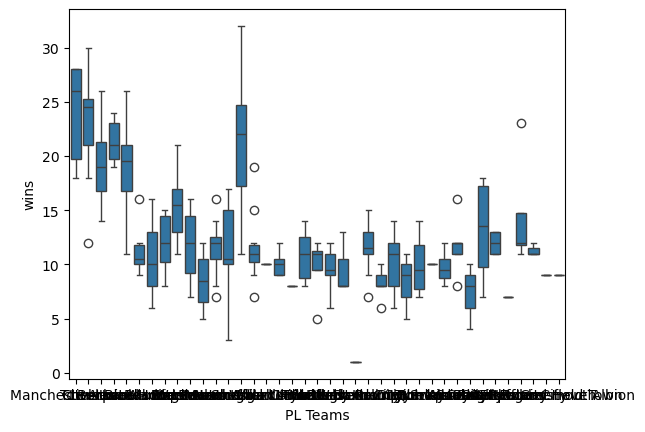

In [189]:
#Box plot

sns.boxplot( x="PL Teams", y="wins", data=df)
plt.show()

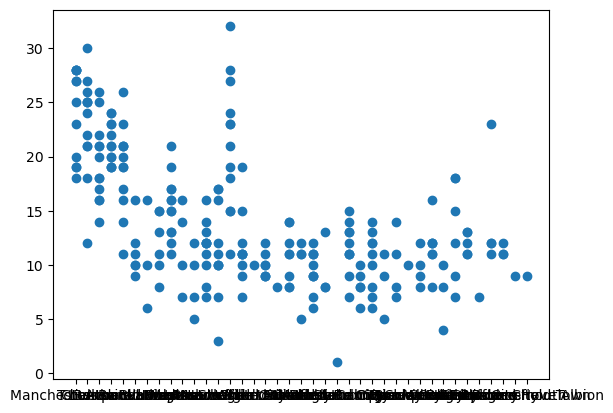

In [214]:
# Scatter plot

plt.scatter(df["PL Teams"], df["wins"])
plt.show()

In [220]:
#Model building & Splitting data

x = df[["goals","ontarget_scoring_att"]]

#Classification
y_class = df["wins"]

#Regression
y_reg = df["PL Teams"]

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split( x, y_class, test_size = 0.2, random_state = 42) 
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split( x, y_reg, test_size = 0.2, random_state = 42)


In [230]:
#Linear Regression

lr = LinearRegression()
lr.fit( x_train_c, y_train_c )

print("Predictions:", lr.predict( x_test_c ))



Predictions: [15.22608102 13.4181913  13.64083726 12.39941393 15.10791471 11.88568872
 12.33499153 14.43295777 12.9004552  19.99249079 15.22608102 17.7479822
 11.43538319 12.41410331 11.71377851 12.16207859 16.2565396   8.26589839
  9.82577428 16.22816356 14.69766643  7.1172735   6.15424549 12.03022562
  8.12136149 11.60829613 11.5154977  26.14586352  9.60012015  9.8911994
 15.01511627 14.97606175 20.00718018 20.74555679  9.79840097 11.13162001
 11.76651969  8.74157179  8.10867755 10.37955674 10.90897405  7.97782731
 19.06952003  9.65286134 10.5377803  14.10382672 15.00042689 10.11484808]


In [226]:
# logistic Regression

logr = LogisticRegression()
logr.fit( x_train_r, y_train_r )

print("Predictions:", logr.predict( x_test_r ))


Predictions: ['Chelsea' 'Manchester City' 'Tottenham Hotspur' 'Tottenham Hotspur'
 'Manchester City' 'Chelsea' 'Manchester City' 'Tottenham Hotspur'
 'Wigan Athletic' 'Chelsea' 'Chelsea' 'Chelsea' 'Tottenham Hotspur'
 'Manchester City' 'Chelsea' 'Tottenham Hotspur' 'Manchester City'
 'Wigan Athletic' 'Chelsea' 'Tottenham Hotspur' 'Liverpool'
 'Wigan Athletic' 'Tottenham Hotspur' 'Tottenham Hotspur'
 'West Ham United' 'Chelsea' 'Liverpool' 'Chelsea' 'Tottenham Hotspur'
 'Tottenham Hotspur' 'Chelsea' 'Manchester City' 'Manchester City'
 'Chelsea' 'Tottenham Hotspur' 'Tottenham Hotspur' 'Chelsea'
 'Wigan Athletic' 'Tottenham Hotspur' 'Tottenham Hotspur'
 'Manchester City' 'Manchester City' 'Manchester City' 'West Ham United'
 'Tottenham Hotspur' 'Chelsea' 'Tottenham Hotspur' 'West Ham United']


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
